## Mean Average Precision (MAP)
* If we have an algorithm that is returning a ranked ordering of items, each item is either hit or miss (like relevant vs. irrelevant search results) and items further down in the list are less likely to be used (like search results at the bottom of the page), then MAP can be used here.

* In recommendation system, we recommend a few items (let's say k) for each user. Now, how we can find whether our recommendations to every user were efficient? In a classification problem, we usually use the precision and recall evaluation metrics. Similarly, for recommender systems, we use a mix of precision and recall — Mean Average Precision (MAP) metric, specifically MAP@k, where k recommendations are provided.

* Using MAP to evaluate a recommendation system algorithm implies that we are treating the recommendation like a ranking task.
* Using MAP we can know for users, not just five products they might like, but also which are most liked or which one can be most confident of. This lets us show the top recommendations first.

* `M` in `MAP` is just an average (mean) of APs, average precision, of all users. In other words, we take the mean for average precision, hence Mean Average Precision. If we have 1000 users, we sum APs for each user and divide the sum by 1000. This is the MAP.

* One should know about Precision and Recall before knowing MAP.

        Precision:

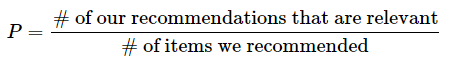

         Recall:
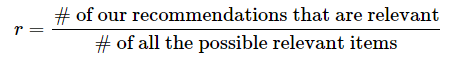


* There is usually an inverse relationship between recall and precision. Precision is concerned about how many recommendations are relevant among the provided recommendations. Recall is concerned about how many recommendations are provided among all the relevant recommendations.

- Let's first calculate recall@k and precision@k 
    - Let's assume we are providing 5 recommendations in this order — 1 0 1 0 1, where 1 represents relevant and 0 irrelevant.
    - So the precision@k at different values of k will be precision@3 (i.e if first three recommendations are only considered) is 2/3, precision@4 is 2/4, and precision@5 is 3/5.
    - And the recall@k would be, recall@3 is 2/3, recall@4 is 2/3, and recall@5 is 3/3.
- we can recommend at most k items for each user
- it is better to submit all k recommendations because we are not penalized for bad guesses
- order matters, so it’s better to submit more certain recommendations first, followed by recommendations we are less sure about
- So basically we select k best recommendations (in order) and that’s it.


### Average Precision
* If we are asked to recommend N items, the number of relevant items in the full space of items is m, then:
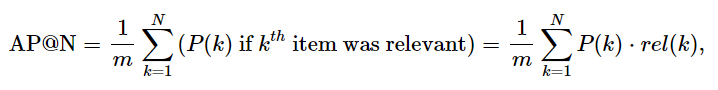

    where **P(k)** is the precision value at the kth recommendation and **rel(k)** is just an indicator that says whether that kth item was relevant (rel(k)=1) or not (rel(k)=0). 
    
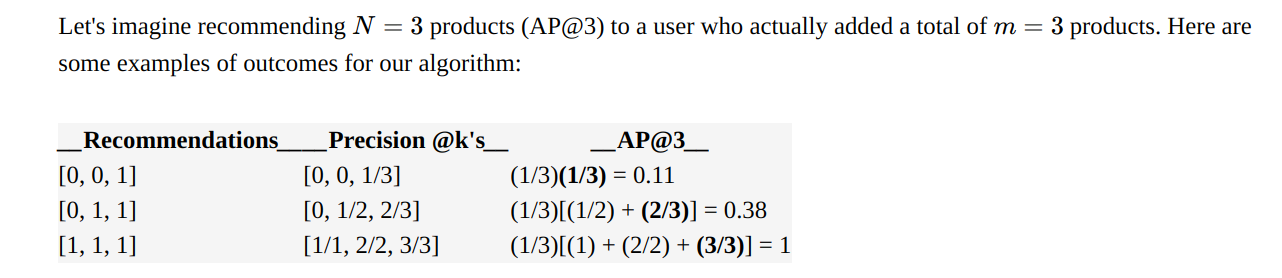

* For calculating AP above we just divided by 3 as 3 recommendations were there
* More correct recommendations, larger is AP.
* In each row bolded term P(k) term which came from the correct recommendation in the third slot. Notice it is larger when there have been more successes in front of it - that's because the precision of the kth subset is higher the more correct guesses we've had up to point k. Thus, AP rewards us for front-loading the recommendations that are most likely to be correct. We can verify this is next example:
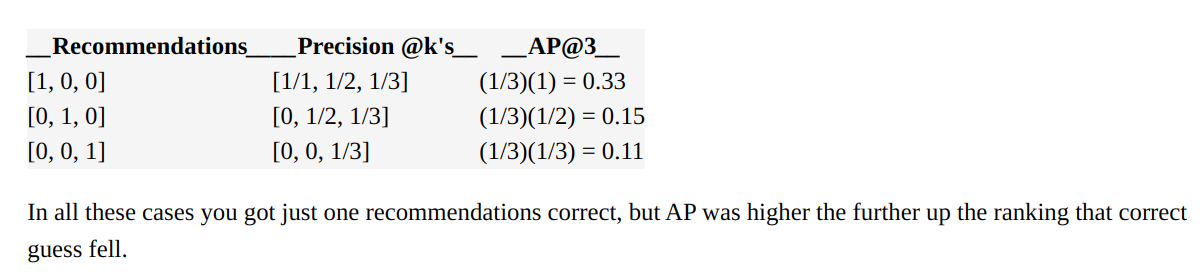

### The "Mean" in MAP
* Average Precision which applies to a single data point (like a single user). But MAP@N is to average the AP@N metric over all your |U| users.
* It is an average of an average.
* Formula:
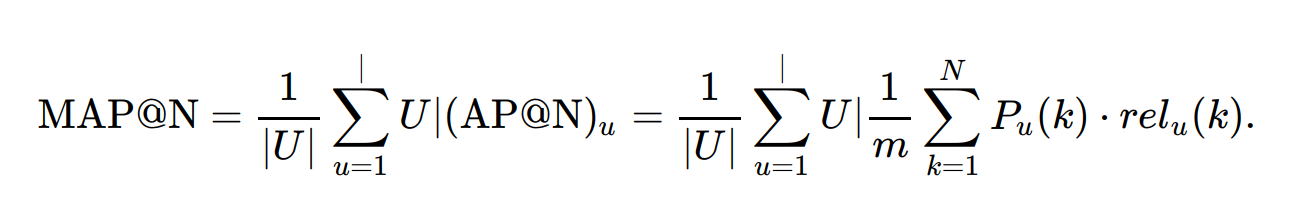

### Notes:
* There is an alternative formula for the AP in terms of Precision and Recall:
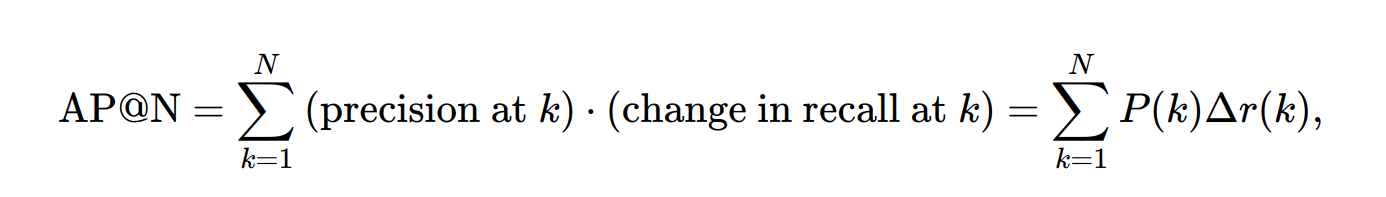
   Δr(k)  is the change in recall from the k−1th to the kth subset
   

Reference: https://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html


In [7]:
# We can calcuate AP using scikit-learn
# scikit-learn uses the alternate formula i.e.: ∑(Rn- Rn-1)Pn
# AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold,
# with the increase in recall from the previous threshold used as the weight

import numpy as np
from sklearn.metrics import average_precision_score
y_true = np.array([0, 1, 0, 1])
y_scores = np.array([0.3, 0.1, 0.45, 0.7])
average_precision_score(y_true, y_scores)

0.75